# Modelling Stop Distance with respect to Speed

The model was trained by minimizing squared errors by taking derivatives w.r.t speed.

<b> total stopping distance = 1.104*speedd + 0.054 * speed^2 </b>

In [2]:
import numpy as np
import pandas as pd

### Load in Data

In [4]:
#data_train = np.random.rand(10000,2,3)
#np.random.shuffle(data_train)
#batch_size = 100
#for i in range(0,len(data_train), batch_size):
#    x_batch_sum = np.sum(data_train[i:i+batch_size])
#    print("{} batch, sum : {}". format(i,x_batch_sum))

In [5]:
#read in input data from csv
df = pd.read_csv("stopping_distance.csv")
df

,mph,driver_reaction_distance,breaking_distance,total_stopping_distance
0,20,22,20.0,42.0
1,25,28,28.0,56.0
2,30,33,40.5,73.5
3,35,39,52.5,91.5
4,40,44,72.0,116.0
5,45,50,92.5,142.5
6,50,55,118.0,173.0
7,55,61,148.5,209.5
8,60,66,182.0,248.0
9,65,72,220.5,292.5


### Visalize thinking distance and breaking distance with respect to speed

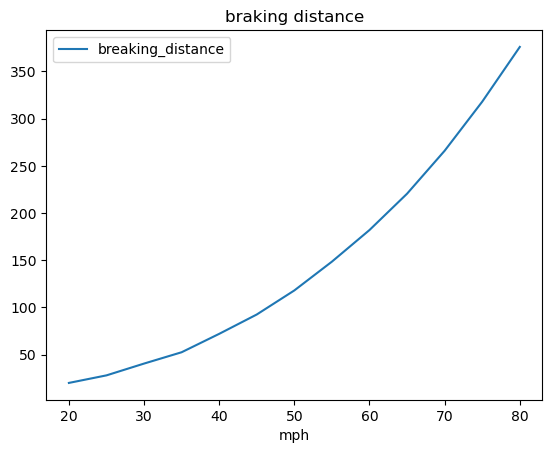

In [7]:
df[["mph", "breaking_distance"]].set_index("mph").plot(title="braking distance");

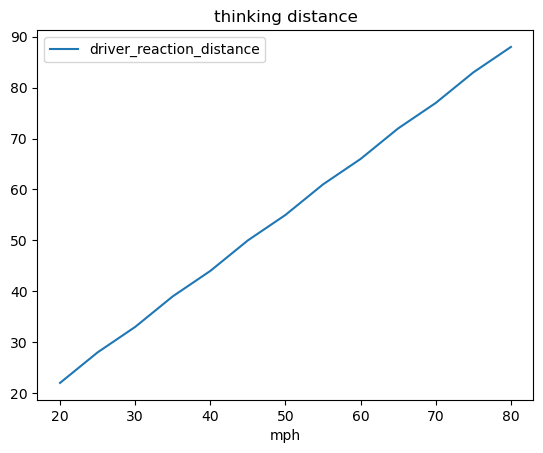

In [8]:
df[["mph", "driver_reaction_distance"]].set_index("mph").plot(title="thinking distance");

<Axes: title={'center': 'stopping distance'}, xlabel='mph'>

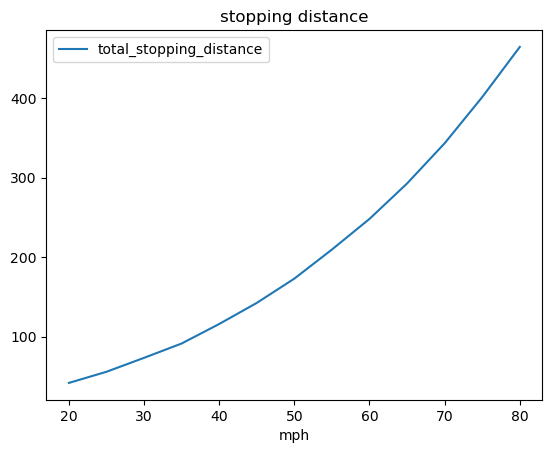

In [9]:
df[["mph", "total_stopping_distance"]].set_index("mph").plot(title="stopping distance")

### Model thinking distance and breaking distance with respect to speed

Estimate parameters by minimizing squared error and take derivative with respect to speed. Min error achieved when derivative is zero.

- thinkin distance = a1 * speed
- breaking distance = a2 * speed * speed

In [11]:
sum = 0
denom = 0
sum2= 0
denom2=0

for index, row in df.iterrows():
    x = row['mph']
    y = row['driver_reaction_distance']
    z = row['breaking_distance']
    sum += x*x*z
    denom += x**4
    sum2 += x*y
    denom2 += x**2
    
bcoef = sum/denom
tcoef = (sum2)/(denom2)

print("coefficient for the breaking distance: ", bcoef)
print("thinking distance coeffficient: ", tcoef)


coefficient for the breaking distance:  0.05420865641025641
thinking distance coeffficient:  1.1040485829959514
